### GROUP 5 - LAB 6 
* Elizabeth Linares
* Daniel Carrillo
* Sonia Asto

# Estimating Treatment Effects with Causal Forests: An Application

This script has replication for the paper "Estimating Treatment Effects with Causal Forests: An Application", by Athey and Wager. 

The attached dataset is based on preliminary data extracted from the National Study of Learning Mindsets (http://mindsetscholarsnetwork.org/about-the-network/current-initatives/national-mindset-study/). This is a study that evalutes a "nudge-like" intervention to change student behavior at very low cost, but seeks to understand heterogeneity in the intervention. The main goal of the study is to test for heterogeneity in the effect of an intervention designed to instill students with a "growth mindset". A growth mindset is the belief that intelligence can be developed. It is contrasted with a fixed mindset: the belief that intelligence is a fixed trait that is set in stone at birth. (http://mindsetscholarsnetwork.org/learning-mindsets/growth-mindset/). Because growth mindset interventions only teach students to see their school differently, but don't try to change schools themselves, then growth mindset interventions are thought to depend in important ways on the school context. But research has not yet interrogated treatment effect heterogeneity sufficiently.

In [1]:
#Delete objects from the memory
rm(list = ls())

#Set up a seed
set.seed(3)

In [36]:
#Load packages
library(grf)
library(sandwich)
library(lmtest)
library(Hmisc)
library(ggplot2)

In [3]:
#Read data
#data.all = read.csv("synthetic_data.csv")
data.all = read.csv("https://raw.githubusercontent.com/grf-labs/grf/master/experiments/acic18/synthetic_data.csv")
data.all

schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,1,0.081601672,6,4,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.385868955,4,12,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.398183726,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.175036855,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.884583369,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.090564771,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,1.024043152,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.516234241,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,1.425760714,6,5,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567


Attached is a dataset of about 10,391 students in 76 schools with a simulated outcome Y (a continuous measure of achievement), a binary treatment variable Z indicating receipt of the intervention, and the following 10 covariates at both the student and school level:
* S3 - Students' self-reported expectations for success in the future, a proxy for prior achievement, measured prior to random assignment
* C1 - Categorical variable for student race/ethnicity
* C2 - Categorical variable for student identified gender
* C3 - Categorical variable for student first-generation status (i.e. first in family to go to college)
* XC - School-level categorical variable for urbanicity of the school (i.e. rural, suburban, etc.)
* X1 - School-level mean of students' fixed mindsets, reported prior to random assignment
* X2 - School achievement level, as measured by test scores and college preparation for the previous 4 cohorts of students
* X3 - School racial/ethnic minority composition -- i.e. % black, latino, or native/american
* X4 - School poverty concentration -- i.e. % of students who are from families whose incomes fall below the federal poverty line
* X5 - School size - Total # of students in all four grade levels in the school 

In [4]:
# Select the schoolid variable of the data as factor
data.all$schoolid = factor(data.all$schoolid)

# Compute a dataframe without the school.id variable
DF = data.all[,-1]

# Compute school.id variable
school.id = as.numeric(data.all$schoolid)

# Dummys variables are formed from the variable schoolid
school.mat = model.matrix(~ schoolid + 0, data = data.all)

# Number of observations that each school.id variable has
school.size = colSums(school.mat)

In [5]:
# It appears that school ID does not affect pscore. So ignore it
# in modeling, and just treat it as source of per-cluster error.
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)


Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2079  -0.9088  -0.8297   1.4176   1.9556  

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.9

In [6]:
W = DF$Z   
Y = DF$Y
X.raw = DF[,-(1:2)]

C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

## Grow a causal forest

*First, we train $Y.forest$ and $W.forest$ to calculate the predicted values of the two variables ($Y.hat$ and $W.hat$)*

In [7]:
Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

*Then, we use $Y.hat$ and $W.hat$ as inputs for the causal forest.*

In [8]:
#We train a first forest on all the features - pilot causal forest
cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)

*We train a second forest on only those features that saw a reasonable number of splits in the previous step.*

In [9]:
#Obtain % of causal forest splits spent on one variable
varimp = variable_importance(cf.raw)

#Select the features that have a percentage greater than the average
selected.idx = which(varimp > mean(varimp))

#We train a second forest on only those selected features 
cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")

tau.hat = predict(cf)$predictions

## Estimate ATE

In [10]:
#Estimate ATE
ATE = average_treatment_effect(cf)
ATE
#Print results
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))

estimate    std.err 
0.24797608 0.02072163

[1] "95% CI for the ATE: 0.248 +/- 0.041"

*The result obtained suggests that the treatment was significantly positive on average. The average treatment effect is 0.248*

## Assessing treatment heterogeneity

* ### Run best linear predictor analysis

The function `test_calibration` computes an estimate of the best linear predictor of true CATE based on out-of-bag predictions $\hat{\tau}^{-i}(\cdot)$. The exact implementation seeks to fit the following linear model:

\begin{equation}
Y_{i} - \hat{m}^{-i}(X_{i}) = \alpha\bar{\tau}\left(W_{i} - \hat{e}^{-i}(X_{i})\right) + \beta \left(\hat{\tau}^{-i}(X_{i}) - \bar{\tau} \right) \left(W_{i} - \hat{e}^{-i}(X_{i}) \right) + \epsilon,
\end{equation}

where $\bar{\tau} := n^{-1}\sum_{i=1}^{n} \hat{\tau}^{-i}(X_{i})$. The coefficients $\alpha$ and $\beta$ allow us to evaluate the performance of our estimates.

The slope $\beta$ is a measure of how the CATE predictions covary with true CATE. Therefore, the p-value on the estimate of coefficient also acts as an omnibus test for the presence of heterogeneity. 

In [11]:
test_calibration(cf)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         0.993286   0.082139 12.0927 <2e-16 ***
differential.forest.prediction 0.356036   0.631882  0.5635 0.2866    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


*In this case, $\beta \neq 1$, so the forest predictions do not adequately capture the underlying heterogeneity. However, $\beta$ is also not significantly greater than zero, so we cannot reject the null of no heterogeneity. The value of $\beta$ is negative and not significant.On the other hand, $\alpha = 1$ significantly so the mean prediction produced by the forest is correct.*

 * ### Compare regions with high and low estimated CATEs

*To test for heterogeneity, the observations will be grouped into 2 groups such that the observations whose CATE estimate is above the median CATE estimate form one group and those below form another. 
We then estimate the mean treatment effects in these two subgroups separately using the doubly robust approach.*

In [12]:
#Set up the condition to divided the observation into 2 groups
high_effect = tau.hat > median(tau.hat)

#Estimation ATE for each group
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)

#Show results
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))

[1] "95% CI for difference in ATE: 0.047 +/- 0.077"

*The results both in the analysis of the best linear predictor and the comparison of regions with low and high estimated CATEs show the presence of heterogeneity. However, they are not significant, because the confidence interval is observed to contain zero. Thus, it appears that the causal forests are not identifying subgroups with heterogeneous effects that are clearly detectable.*

## The effect of $X1$ and $X2$

In [13]:
dr.score = tau.hat + W / cf$W.hat *
           (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
           (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)

school.score = t(school.mat) %*% dr.score / school.size

* ### Formal test for X1

In [14]:
school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0256, df = 72.417, p-value = 0.003434
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19194867 -0.03948123
sample estimates:
mean of x mean of y 
0.1901658 0.3058807 


*The result of this analysis is that there is heterogeneity along the variable $X1$.Moreover, this heterogeneous effect is significant, since its confidence interval does not contain zero. We cannot yet say whether larger values of $X1$ correspond to larger or smaller effects. This will be observed more clearly in a graph that will be shown later.*

* ### Formal test for X2

In [15]:
school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])

school.X2.levels = cut(school.X2,
                        breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))


	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 1.03, df = 72.076, p-value = 0.3064
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03878176  0.12170782
sample estimates:
mean of x mean of y 
0.2687548 0.2272917 


                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2 0.0845 0.04227   1.386  0.257
Residuals        73 2.2265 0.03050               

*In the case of the variable $X2$, we do not observe a very marked heterogeneity, as well as it is not significant, since its confidence interval contains zero.*

* ### Formal test for S3


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.232, df = 75, p-value = 0.0286
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.009038265 0.159160807
sample estimates:
 mean of x 
0.08409954 


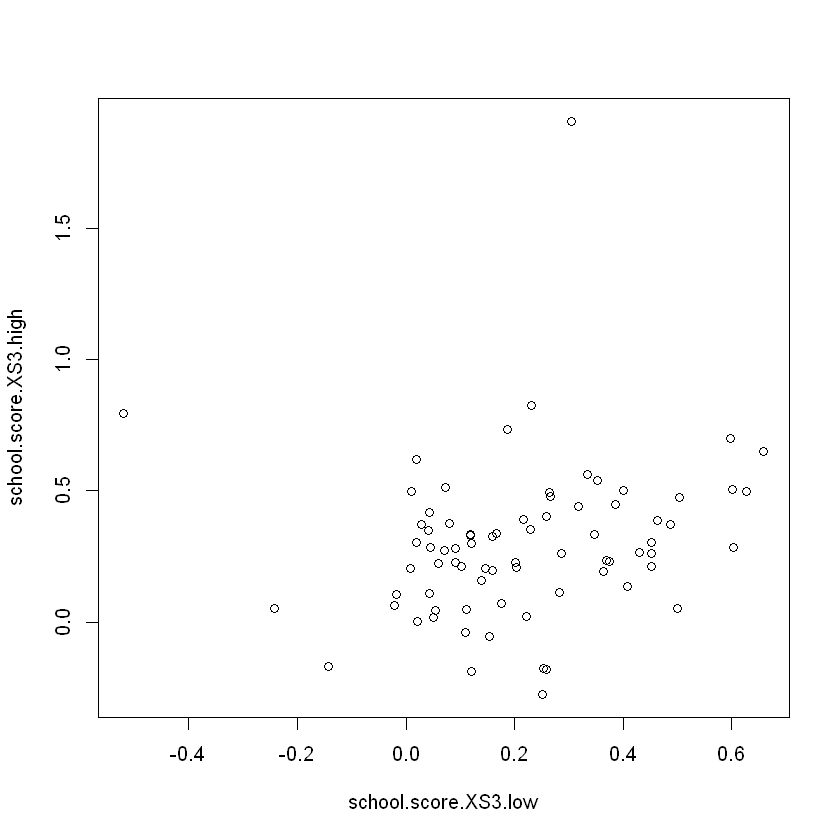

In [16]:
school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) / t(school.mat) %*% (X$S3 >= 6)
                        
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) / t(school.mat) %*% (X$S3 < 6)

plot(school.score.XS3.low, school.score.XS3.high)

t.test(school.score.XS3.high - school.score.XS3.low)

## Looking for school-level heterogeneity

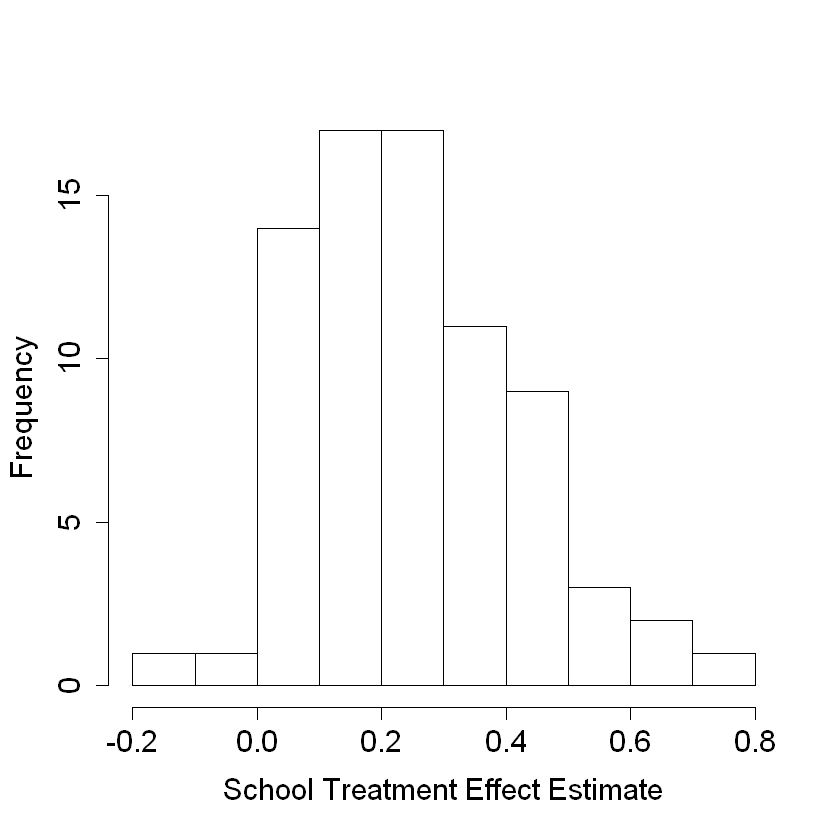

In [17]:
#pdf("school_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")
#dev.off()

*In the graph we see that the estimate of the treatment effect in the schools is scattered, so it seems that there are heterogeneous effects at the school level. This is due to the fact that in the histogram, there is no concentration at a single point, since the values are concentrated between the values [0, 0.4].*

[1] "0.248 +/- 0.039"


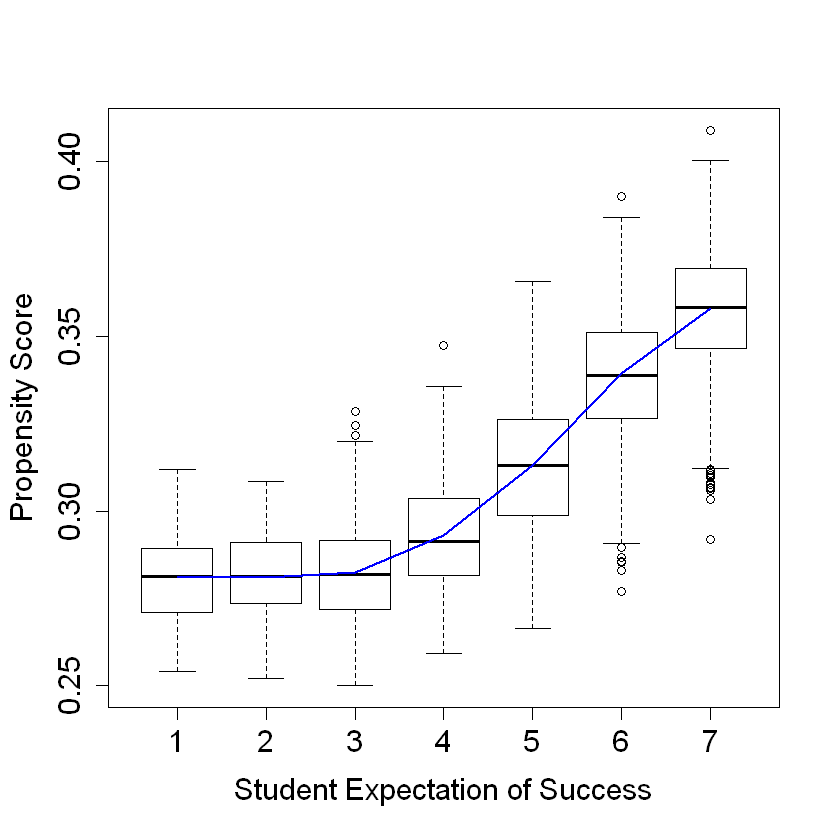

In [18]:
# Re-check ATE... sanity check only
ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))

# Look at variation in propensity scores
DF = X
DF$W.hat = cf$W.hat

#pdf("pscore.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)
#dev.off()

*The box plot shows that students with higher expectations of success ($S3$) appear to be more likely to receive the $W$ treatment.This is observed throughout the box-plot structure, as the median, upper and lower end, as well as the outliers follow this trend.*

## 5. Analysis ignoring clusters

In [19]:
#Causal Forest without clustering
cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")
#Estimate ATE
ATE.noclust = average_treatment_effect(cf.noclust)
ATE.noclust
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

estimate    std.err 
0.25315231 0.01136147

[1] "95% CI for the ATE: 0.253 +/- 0.022"

In [20]:
#Assessing treatment heterogeneity by best linear predictor analysis
test_calibration(cf.noclust)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.010938   0.045072 22.4296 < 2.2e-16 ***
differential.forest.prediction 0.507427   0.124600  4.0725 2.343e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


*The calibration test shows that heterogeneity is almost certainly detectable, as both the mean of the forest predictions and the differential of the forest predictions are significant at 1%.*

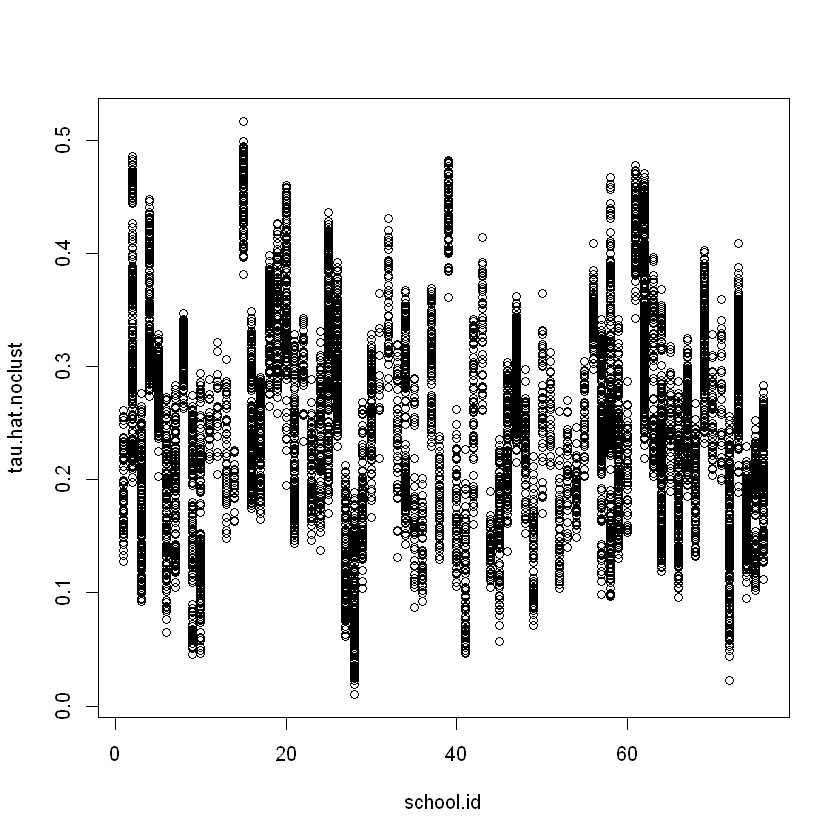

In [21]:
#Plotting predictions in a causal forest without school clustering
tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

In [22]:
nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

tau.hat.crossfold = rep(NA, length(Y))

for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id

test_calibration(cf.noclust.cpy)

Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

summary(aov(dr.score ~ factor(school.id)))

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction          1.00594    0.06573 15.3042 < 2e-16 ***
differential.forest.prediction  0.31855    0.22224  1.4333 0.07589 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 4.754082e-06 2.964382e-04

                     Df Sum Sq Mean Sq F value   Pr(>F)    
factor(school.id)    75    201   2.678   1.979 1.08e-06 ***
Residuals         10315  13957   1.353                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 6. Analaysis without fitting the propensity score

In [23]:
#Causal Forest fitting the propensity score
cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)

tau.hat.noprop = predict(cf.noprop)$predictions

#Estimate ATE
ATE.noprop = average_treatment_effect(cf.noprop)
ATE.noprop
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

estimate    std.err 
0.25499410 0.02072123

[1] "95% CI for the ATE: 0.255 +/- 0.041"

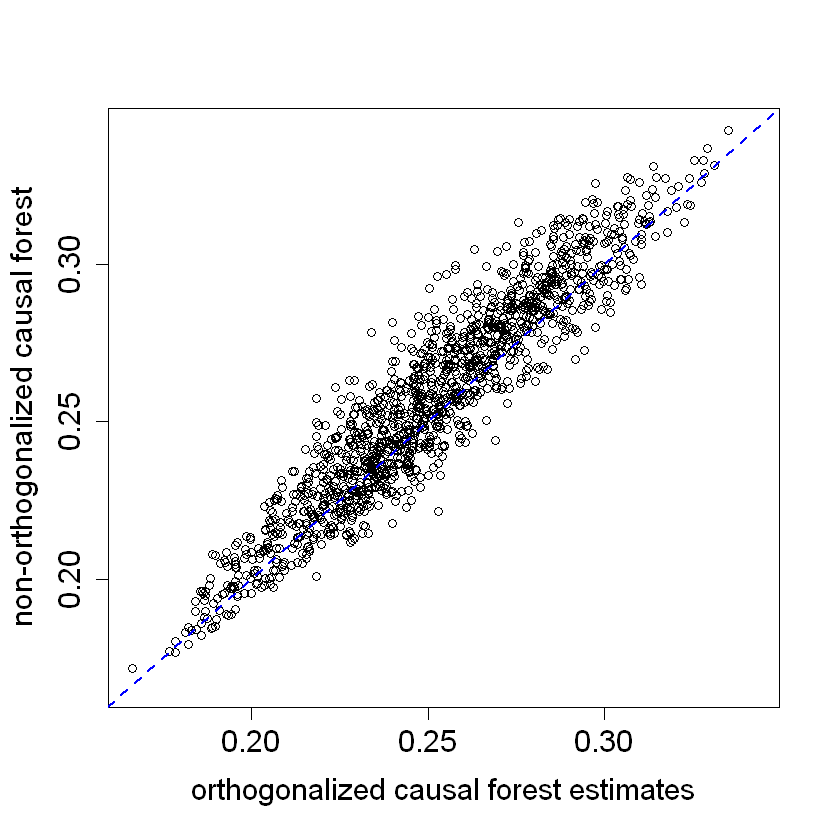

In [24]:
#pdf("tauhat_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
#dev.off()

*It is observed that forests trained with or without orthogonalization result in the same CATE estimates. So orthogonalization seems to be less important than clustering. 
This may be because for both W and Y forest , the variable of students' expectations of success($S3$) is the most important predictor.*

* ### Experiment with no orthogonalization

In [25]:
n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

#Compute the prediccions of Y an W forest to use in the causal forest
Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

#Synthetic model with orthogonalization
#######################################
cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)

ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

#Synthetic model without orthogonalization
##########################################

cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))

ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))


[1] "95% CI for the ATE: 0.026 +/- 0.144"

[1] "95% CI for the ATE: 0.112 +/- 0.136"

*However, it is also possible that the non-orthogonalized forest does well by luck and not because there are confounding factors with a strong effect on the propensity model. To test this hypothesis, the authors present a synthetic example in which some variables have stronger effects on W than on Y and it is observed that orthogonalization is now importantbecause the CATE estimates are now different.*

In [26]:
# Train forest on school-wise DR scores
school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                    "XC.1", "XC.2", "XC.3", "XC.4")

dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.005941   0.082664  12.169 <2e-16 ***
differential.forest.prediction 0.704663   0.703224   1.002 0.1598    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.2430904  0.0740777  3.2816 0.001652 **
X1          -0.0491853  0.0287977 -1.7080 0.092344 . 
X2           0.0145308  0.0334114  0.4349 0.665050   
X3           0.0097011  0.0264255  0.3671 0.714712   
X4           0.0237153  0.0252138  0.9406 0.350357   
X5          -0.0353187  0.0265648 -1.3295 0.188250   
XC.1        -0.0019752  0.0903007 -0.0219 0.982615   
XC.2         0.0837446  0.1031685  0.8117 0.419866   
XC.3        -0.1358266  0.0846012 -1.6055 0.113160   
XC.4         0.0420586  0.0793150  0.5303 0.597702   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## 7.  Make some plots

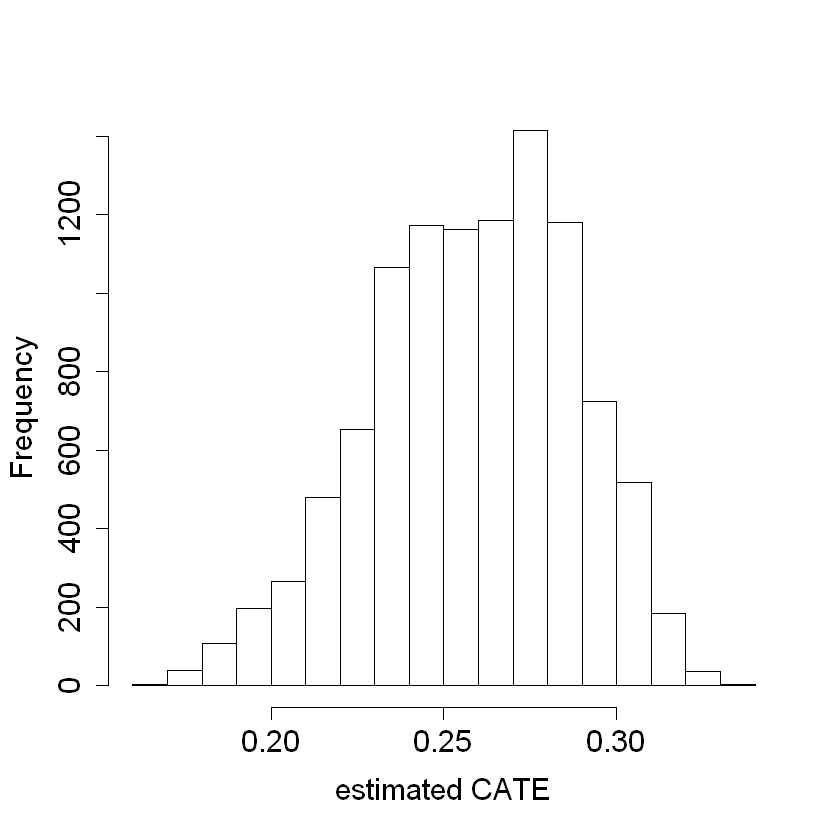

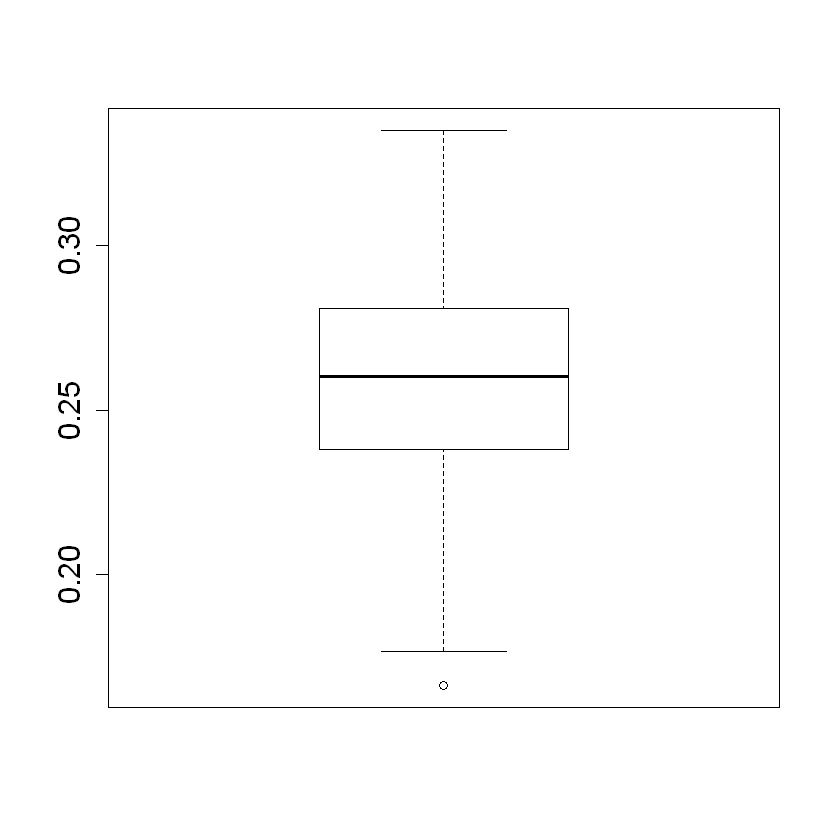

In [27]:
#pdf("tauhat_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")
boxplot(tau.hat)
#dev.off()

*If the histogram is concentrated at one point, it may be that the model is underpowered to detect some heterogeneity. If the histogram is scattered, it may not necessarily be because there is heterogeneity, but rather there may be overfitting, i.e., the estimates are very noisy $\widehat{\tau}(x)$, although the true $\tau(x)$ may be much smoother as a function of $x$ . Furthermore, it is observed that the distribution has a mean around approximately 0.25 and is scattered around this.  In the box plot, it is also observed that there are extreme values that exceed the upper whisker.* 

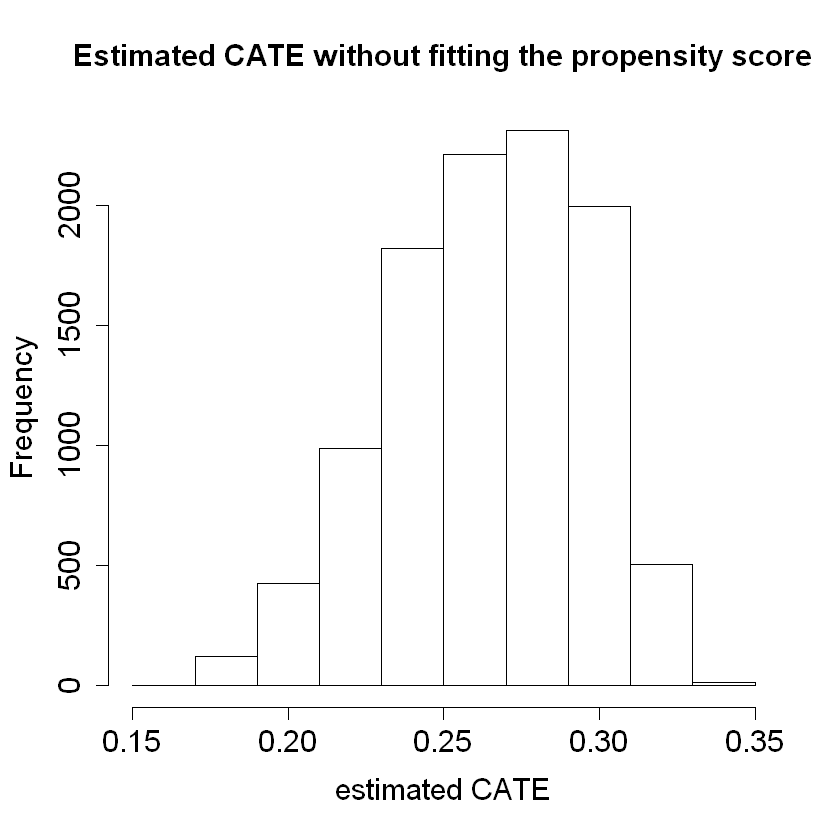

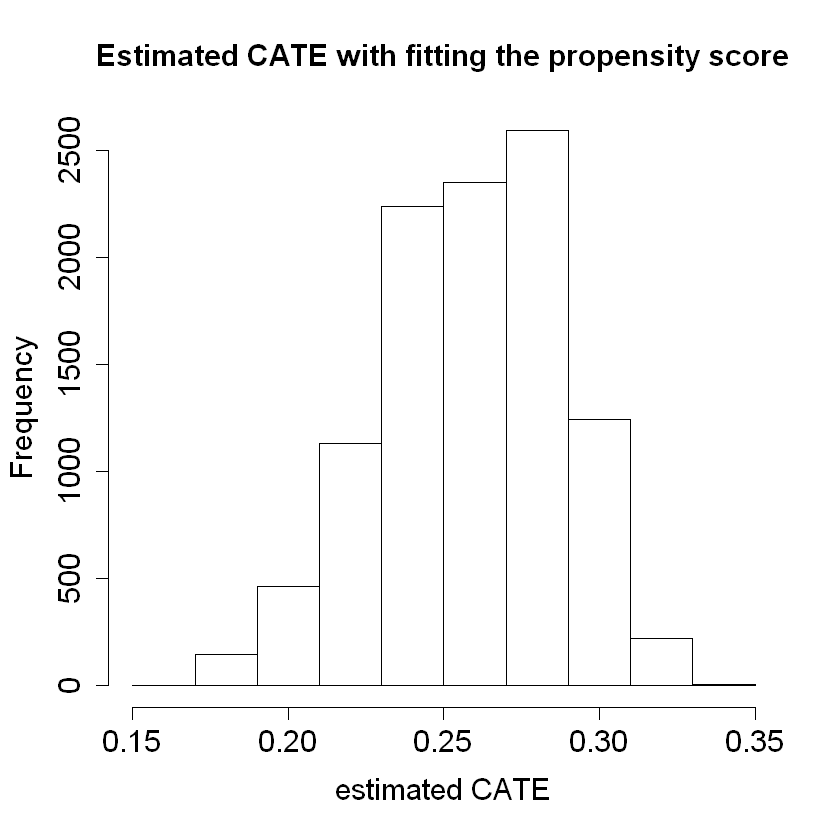

In [28]:
#pdf("tauhat_hist_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noprop, xlab = "estimated CATE", main = "Estimated CATE without fitting the propensity score",
     breaks = seq(0.15, 0.35, by = 0.50 / 25))
#dev.off()

#Comparing wiht estimated CATE with fitting propensity score
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
b<-hist(tau.hat, xlab = "estimated CATE", main = "Estimated CATE with fitting the propensity score",
       breaks = seq(0.15, 0.35, by = 0.50 / 25))

*If we analyze the histograms as a function of the dispersion of the distribution of the CATE estimates with and without propensity scores, we observe that there is a greater dispersion when estimating without propensity scores. However, this does not necessarily mean that the presence of propensity scores is irrelevant.*

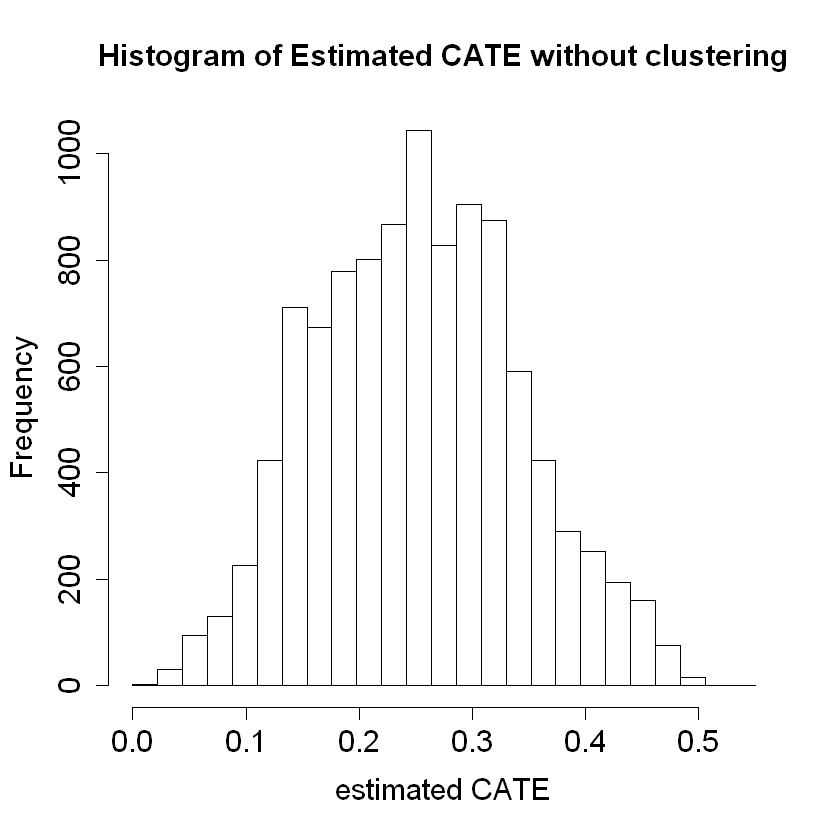

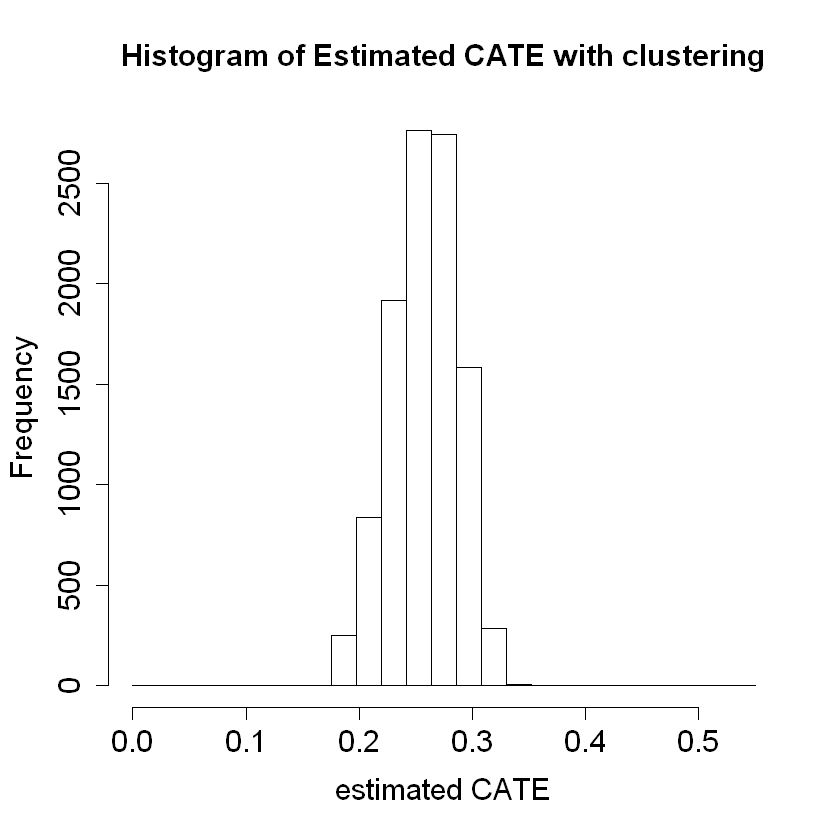

In [29]:
#pdf("tauhat_hist_noclust.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
a<-hist(tau.hat.noclust, xlab = "estimated CATE", main = "Histogram of Estimated CATE without clustering",
        breaks = seq(-0.0, 0.55, by = 0.55 / 25))
#dev.off()

#Comparing wiht estimated CATE with clustering
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
b<-hist(tau.hat, xlab = "estimated CATE", main = "Histogram of Estimated CATE with clustering",
        breaks = seq(-0.0, 0.55, by = 0.55 / 25))

*It can be seen from both histograms that the CATE estimates without clustering are much more spread out than the estimates obtained with clustering. Then as the case of the CATE estimates without clustering are more dispersed, it may be overfitting, so that noisier estimates are produced.*

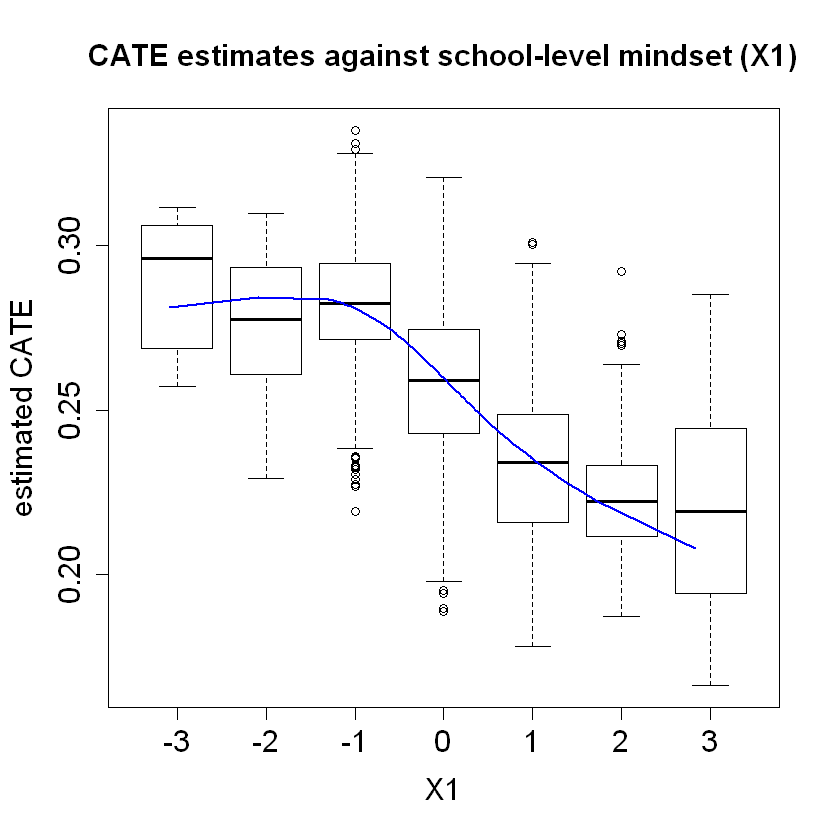

In [30]:
#pdf("tauhat_vs_X1.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE",
        main = "CATE estimates against school-level mindset (X1)")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)
#dev.off()

*In this graph we can observe that there is heterogeneity along the school mindset level, because for each mean value of the fixed mindsets of the students per school ($X1$) they do not experience the same mean treatment effect. Recall that we had previously found that heterogeneity along X1 was significant. It is observed that there is a maximum of the estimated CATE occurring $X1=-1$, this maximum value seems to remain constant when $X1$ is between [-3,-1].However, the estimated CATE has a decreasing trend for those values between ]-1, 3]*.

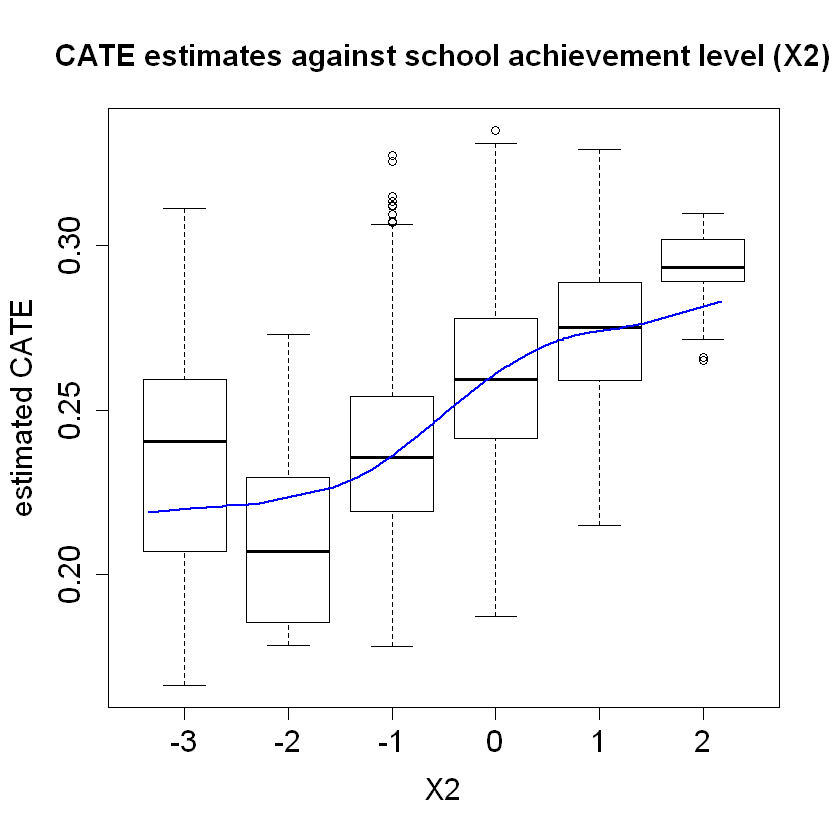

In [31]:
#pdf("tauhat_vs_X2.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE",
        main = "CATE estimates against school achievement level (X2)")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)
#dev.off()

*In the image, it appears that the value of the estimated CATE varies according to the values of the school achievement level ($X2$).This is because for higher values of the school performance level ($X2$), the average treatment effect is much larger; that is, an increasing trend is observed. However, we had previously found that there was not much heterogeneity and that it was not significant, since the p-value was too high (=0.3064).*

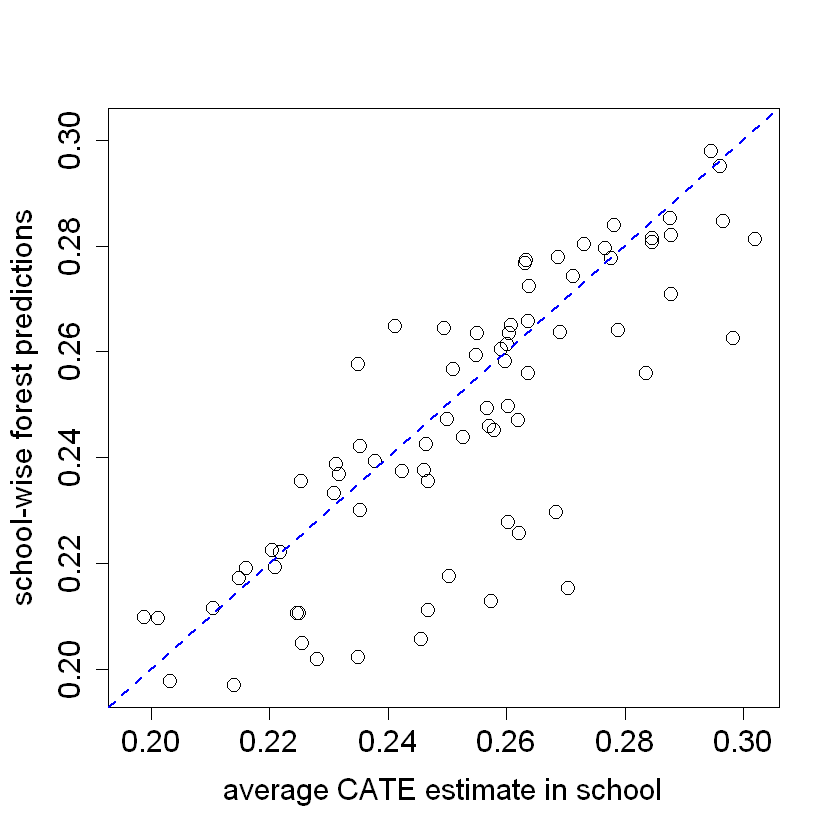

In [32]:
#GRAPHIC
school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

#pdf("school_avg.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(school.avg.tauhat, school.pred, cex = 1.5,
     xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred),
     xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
#dev.off()

This plot compares the predictions made by the regression forest trained to predict the estimates of the doubly robust per-school treatment effect $\hat{\tau}_j$ using school-level covariates with the school-wise-averaged predictions of the original causal forest $\hat{\tau}^{-i}(X_{i})$. It is therefore observed that these predictions are not closely aligned.

## Visualize school-level covariates by treatment heterogeneity

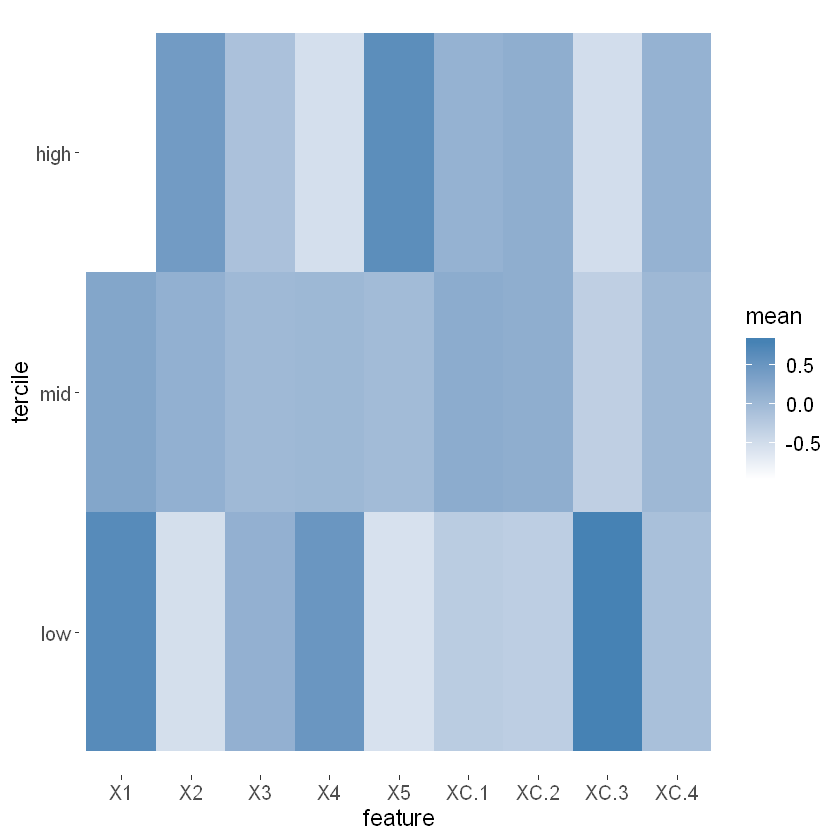

In [33]:
school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))

school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
#ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

*This graph shows that the covariates used in the causal forest do not have the same mean in all the schools, since we observe that the schools in the first tercile of the schools have a higher mean with respect to their level of mindset ($X1$). Likewise, we observe that in the case of school achievement ($X2$), schools in the top tercile have a higher mean. 
Therefore, schools have different characteristics depending on the tercile to which they belong.*

In [34]:
mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

[1] 0.2105263

[1] 0.5384615

## CATE by school

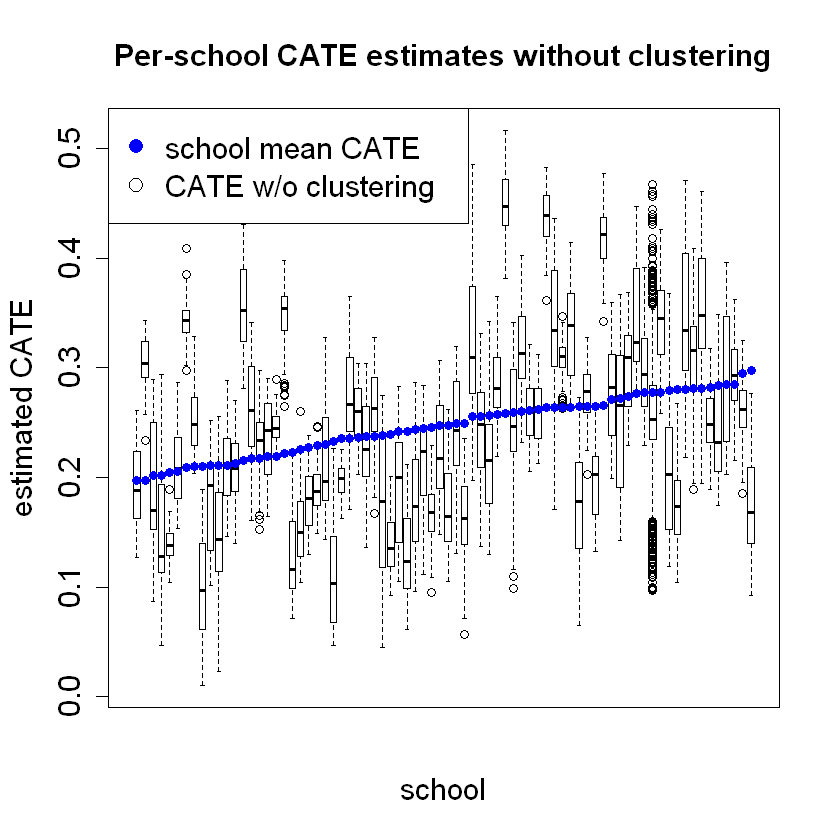

In [35]:
ord = order(order(school.pred))
school.sort = ord[school.id]

#pdf("school_boxplot.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE",
        main = "Per-school CATE estimates without clustering")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef
#dev.off()

*The box plot compares the school-by-school estimates of the causal forest without clustering with the predictions for the school CATE mean obtained in a way that is cluster-robust.Also, we can see that in some schools, the cluster-robust estimate of school mean CATE does not locate between the upper and lower extremes of the box of the non-robust-cluster CATE estimate.*

## Debiased Machine Learning

In [2]:
library(xtable)
library(hdm)

First, we load the data

In [3]:
GrowthData <- GrowthData
save(GrowthData, file = "../data/GrowthData.RData")

We estimate the following partially linear model. We will use the data from The Testing Convergence Hypothesis Lab.

$$
 Y_{j,t} = \beta D_{j,(t-1)} + g(Z_{j,t}) + \epsilon_{j,t}.
$$

$Y$ = outcome: growth rate $D$ = treatment: initial wealth $Z$ = controls: country characteristics

In [4]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

In [5]:
dim(growth)

[1] 90 63

In [6]:
head(growth)

Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,...,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747


In [7]:
# Treatment Variable
d     <- "gdpsh465"

# Outcome Variable
y     <- "Outcome"

In [8]:
# Treatment Variable
D     <- growth[which(colnames(growth) == d)]

# Outcome Variable
Y     <- growth[which(colnames(growth) == y)]

# Construct matrix Z

Z <- growth[,-c(which(colnames(growth)=="Outcome"),which(colnames(growth)=="gdpsh465"),which(colnames(growth)=="intercept"))]

### OLS

We do a simple regression of $Y_{j,t}$ on $D_{j,t-1}$ without taking account the controls as a baseline model.

In [10]:
baseline_formula <- as.formula(paste(y, "~", d ))
baseline.ols <- lm(baseline_formula,data=growth)

In [11]:
est_baseline <- summary(baseline.ols)$coef[2,]
confint(baseline.ols)[2,]
est_baseline

2.5 %      97.5 % 
-0.01081013  0.01344355

Estimate  Std. Error     t value    Pr(>|t|) 
0.001316713 0.006102200 0.215776701 0.829661165

In [12]:
summary(baseline.ols)


Call:
lm(formula = baseline_formula, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147387 -0.024088  0.001209  0.027721  0.139357 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.035207   0.047318   0.744    0.459
gdpsh465    0.001317   0.006102   0.216    0.830

Residual standard error: 0.05159 on 88 degrees of freedom
Multiple R-squared:  0.0005288,	Adjusted R-squared:  -0.01083 
F-statistic: 0.04656 on 1 and 88 DF,  p-value: 0.8297


Now we do it with the controls

In [13]:
control_formula <- as.formula(paste(y, "~", paste(d,paste(colnames(Z),collapse="+"),
                                                          sep="+")))
control_formula

Outcome ~ gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + 
    hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + 
    lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + 
    gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + 
    highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + 
    hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + 
    pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + 
    secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + 
    teasec65 + ex1 + im1 + xr65 + tot1

In [14]:
control.ols <- lm(control_formula,data=growth)
est_ols <- summary(control.ols)$coef[2,]
confint(control.ols)[2,]
est_ols

2.5 %      97.5 % 
-0.07060022  0.05184424

Estimate   Std. Error      t value     Pr(>|t|) 
-0.009377989  0.029887726 -0.313773911  0.756018518

In [15]:
summary(control.ols)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.247160893,0.78450163,0.31505466,0.755056170
gdpsh465,-0.009377989,0.02988773,-0.31377391,0.756018518
bmp1l,-0.068862679,0.03253065,-2.11685513,0.043289718
freeop,0.080068974,0.20786400,0.38519885,0.703000838
freetar,-0.488962605,0.41816285,-1.16931143,0.252136477
h65,-2.362098638,0.85729167,-2.75530338,0.010192435
hm65,0.707143400,0.52314511,1.35171560,0.187285919
hf65,1.693448425,0.50318881,3.36543337,0.002232683
p65,0.265526695,0.16429407,1.61616729,0.117271229
pm65,0.136952626,0.15121749,0.90566657,0.372840111


## DML ALGORITHM

Here we perform inference of the predictive coefficient $\beta$ in our partially linear statistical model, 

$$
Y = D\beta + g(Z) + \epsilon, \quad E (\epsilon | D, Z) = 0,
$$

using the **double machine learning** approach. 

For $\tilde Y = Y- E(Y|Z)$ and $\tilde D= D- E(D|Z)$, we can write
$$
\tilde Y = \alpha \tilde D + \epsilon, \quad E (\epsilon |\tilde D) =0.
$$

Using cross-fitting, we employ modern regression methods
to build estimators $\hat \ell(Z)$ and $\hat m(Z)$ of $\ell(Z):=E(Y|Z)$ and $m(Z):=E(D|Z)$ to obtain the estimates of the residualized quantities:

$$
\tilde Y_i = Y_i  - \hat \ell (Z_i),   \quad \tilde D_i = D_i - \hat m(Z_i), \quad \text{ for each } i = 1,\dots,n.
$$

Finally, using ordinary least squares of $\tilde Y_i$ on $\tilde D_i$, we obtain the 
estimate of $\beta$.

The following algorithm comsumes $Y, D, Z$, and a machine learning method for learning the residuals $\tilde Y$ and $\tilde D$, where the residuals are obtained by cross-validation (cross-fitting). Then, it prints the estimated coefficient $\beta$ and the corresponding standard error from the final OLS regression.

In [17]:
DML2.for.PLM <- function(z, d, y, dreg, yreg, nfold=2) {
  nobs <- nrow(z) #number of observations
  foldid <- rep.int(1:nfold,times = ceiling(nobs/nfold))[sample.int(nobs)] #define folds indices
  I <- split(1:nobs, foldid)  #split observation indices into folds  
  ytil <- dtil <- rep(NA, nobs)
  cat("fold: ")
  for(b in 1:length(I)){
    dfit <- dreg(z[-I[[b]],], d[-I[[b]]]) #take a fold out
    yfit <- yreg(z[-I[[b]],], y[-I[[b]]]) # take a foldt out
    dhat <- predict(dfit, z[I[[b]],], type="response") #predict the left-out fold 
    yhat <- predict(yfit, z[I[[b]],], type="response") #predict the left-out fold  
    dtil[I[[b]]] <- (d[I[[b]]] - dhat) #record residual for the left-out fold
    ytil[I[[b]]] <- (y[I[[b]]] - yhat) #record residial for the left-out fold
    cat(b," ")
        }
  #rfit <- lm(ytil ~ dtil)    #estimate the main parameter by regressing one residual on the other
  data <- data.frame(cbind(ytil, dtil))
  rfit <- lm(ytil ~ dtil,data=data) 
  coef.est <- coef(rfit)[2]  #extract coefficient
  #HC <- vcovHC(rfit)
  se    <- summary(rfit,robust=T)$coefficients[2,2] #record robust standard error by County
  cat(sprintf("\ncoef (se) = %g (%g)\n", coef.est , se))  #printing output
  return( list(coef.est =coef.est , se=se, dtil=dtil, ytil=ytil, rfit=rfit) ) #save output and residuals 
}

In [19]:
library(hdm)
library(glmnet)
library(sandwich)
library(randomForest)

We will use the Double Machine Learning (DML) approach with different machine learning methods, such as: lasso, ridge, random forest, among others.

In [20]:
y <- as.matrix(Y)
d <- as.matrix(D)
z <- as.matrix(Z)
head(data.frame(cbind(y,d)))

Outcome,gdpsh465
-0.02433575,6.591674
0.10047257,6.829794
0.06705148,8.895082
0.06408917,7.565275
0.02792955,7.162397
0.04640744,7.218910


### LASSO

In [21]:
#DML with Lasso:
set.seed(123)
dreg <- function(z,d){ rlasso(z,d, post=FALSE) } #ML method= lasso from hdm 
yreg <- function(z,y){ rlasso(z,y, post=FALSE) } #ML method = lasso from hdm

In [22]:
DML2.lasso = DML2.for.PLM(z, d, y, dreg, yreg, nfold=10)

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = -0.0370317 (0.0147678)


In [23]:
#DML with Post-Lasso:
dreg <- function(z,d){ rlasso(z,d, post=T) } #ML method= lasso from hdm 
yreg <- function(z,y){ rlasso(z,y, post=T) } #ML method = lasso from hdm
DML2.post = DML2.for.PLM(z, d, y, dreg, yreg, nfold=10)

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = -0.0368285 (0.0130791)


In [24]:
#DML with cross-validated Lasso:
dreg <- function(z,d){ cv.glmnet(z,d,family="gaussian", alpha=1) } #ML method = lasso from glmnet 
yreg <- function(z,y){ cv.glmnet(z,y,family="gaussian", alpha=1) }  #ML method = lasso from glmnet 
DML2.lasso.cv = DML2.for.PLM(z, d, y, dreg, yreg, nfold=5)

dreg <- function(z,d){ cv.glmnet(z,d,family="gaussian", alpha=0.5) } #ML method = elastic net from glmnet 
yreg <- function(z,y){ cv.glmnet(z,y,family="gaussian", alpha=0.5) }  #ML method = elastic net from glmnet 
DML2.elnet = DML2.for.PLM(z, d, y, dreg, yreg, nfold=5)

dreg <- function(z,d){ cv.glmnet(z,d,family="gaussian", alpha=0) } #ML method = ridge from glmnet 
yreg <- function(z,y){ cv.glmnet(z,y,family="gaussian", alpha=0) }  #ML method = ridge from glmnet 
DML2.ridge = DML2.for.PLM(z, d, y, dreg, yreg, nfold=5)

fold: 1  2  3  4  5  
coef (se) = -0.0404043 (0.0137764)
fold: 1  2  3  4  5  
coef (se) = -0.037759 (0.0147713)
fold: 1  2  3  4  5  
coef (se) = -0.0376392 (0.0139715)


Here we also compute DML with OLS used as the ML method

In [26]:
dreg <- function(z,d){  glmnet(z,d,family="gaussian", lambda=0) } #ML method = ols from glmnet 
yreg <- function(z,y){  glmnet(z,y,family="gaussian", lambda=0) }  #ML method = ols from glmnet 
DML2.ols = DML2.for.PLM(z, d, y, dreg, yreg, nfold=10)

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = 0.0339338 (0.01129)


### Random Forest 

In [27]:
#DML with Random Forest:
dreg <- function(z,d){ randomForest(z, d) } #ML method=Forest 
yreg <- function(z,y){ randomForest(z, y) } #ML method=Forest
set.seed(1)
DML2.RF = DML2.for.PLM(z, d, y, dreg, yreg, nfold=2) # set to 2 due to computation time

fold: 1  2  
coef (se) = -0.0290514 (0.0115981)


In [28]:
if (!is.null(d) && !is.factor(d))
             max(floor(ncol(z)/3), 1) else floor(sqrt(ncol(z)))

[1] 20

In [29]:
if (!is.null(d) && !is.factor(d)) 5 else 1

[1] 5

#### Here we are going to see which method is better. It's important to see which method works better.

In [30]:
mods<- list(DML2.ols, DML2.lasso, DML2.post, DML2.lasso.cv, DML2.ridge, DML2.elnet, DML2.RF)

RMSE.mdl<- function(mdl) {
RMSEY <- sqrt(mean(mdl$ytil)^2) 
RMSED <- sqrt(mean(mdl$dtil)^2) 
return( list(RMSEY=RMSEY, RMSED=RMSED))
}

#RMSE.mdl(DML2.lasso)

#DML2.lasso$ytil

Res<- lapply(mods, RMSE.mdl)


prRes.Y<- c( Res[[1]]$RMSEY,Res[[2]]$RMSEY, Res[[3]]$RMSEY, Res[[4]]$RMSEY, Res[[5]]$RMSEY,  Res[[6]]$RMSEY, Res[[7]]$RMSEY)
prRes.D<- c( Res[[1]]$RMSED,Res[[2]]$RMSED, Res[[3]]$RMSED, Res[[4]]$RMSED, Res[[5]]$RMSED, Res[[6]]$RMSED, Res[[7]]$RMSED)

prRes<- rbind(prRes.Y, prRes.D); 
rownames(prRes)<- c("RMSE D", "RMSE Y");
colnames(prRes)<- c("OLS", "Lasso", "Post-Lasso", "CV Lasso", "CV Ridge", "CV Elnet", "RF")
print(prRes,digit=6)

               OLS       Lasso  Post-Lasso    CV Lasso   CV Ridge    CV Elnet
RMSE D 2.96704e-05 0.000831523 0.000333837 3.73815e-18 0.00036176 3.81930e-18
RMSE Y 1.24254e-03 0.012439826 0.000541272 4.16895e-03 0.02271355 1.14092e-02
                RF
RMSE D 0.000844267
RMSE Y 0.029621814


It looks like the best method for predicting D is CV Elnet and for preducting Y is CV Lasso.

In [31]:
dreg <- function(z,d){ cv.glmnet(z,d,family="gaussian", alpha=0.5) } #ML method= lasso from hdm 
yreg <- function(z,y){ rlasso(z,y, post=FALSE) }  #ML method = ridge from glmnet 
DML2.best= DML2.for.PLM(z, d, y, dreg, yreg, nfold=10)

fold: 1  2  3  4  5  6  7  8  9  10  
coef (se) = -0.0378322 (0.0141854)


In [32]:
est_baseline

Estimate  Std. Error     t value    Pr(>|t|) 
0.001316713 0.006102200 0.215776701 0.829661165

In [33]:
library(xtable)

table <- matrix(0,9,2)
table[1,1] <- as.numeric(est_baseline[1])
table[2,1] <- as.numeric(est_ols[1])
table[3,1]   <- as.numeric(DML2.lasso$coef.est)
table[4,1]   <- as.numeric(DML2.post$coef.est)
table[5,1]  <-as.numeric(DML2.lasso.cv$coef.est)
table[6,1] <-as.numeric(DML2.elnet$coef.est)
table[7,1] <-as.numeric(DML2.ridge$coef.est)
table[8,1] <-as.numeric(DML2.RF$coef.est)
table[9,1] <-as.numeric(DML2.best$coef.est)
table[1,2] <- as.numeric(est_baseline[2])
table[2,2] <- as.numeric(est_ols[2])
table[3,2]   <- as.numeric(DML2.lasso$se)
table[4,2]   <- as.numeric(DML2.post$se)
table[5,2]  <-as.numeric(DML2.lasso.cv$se)
table[6,2] <-as.numeric(DML2.elnet$se)
table[7,2] <-as.numeric(DML2.ridge$se)
table[8,2] <-as.numeric(DML2.RF$se)
table[9,2] <-as.numeric(DML2.best$se)




################################# Print Results #################################

colnames(table) <- c("Estimate","Standard Error")
rownames(table) <- c("Baseline OLS", "Least Squares with controls", "Lasso", "Post-Lasso", "CV Lasso","CV Elnet", "CV Ridge", "Random Forest", 
                     "Best")

table

,Estimate,Standard Error
Baseline OLS,0.001316713,0.00610220
Least Squares with controls,-0.009377989,0.02988773
Lasso,-0.037031673,0.01476785
Post-Lasso,-0.036828539,0.01307913
CV Lasso,-0.040404330,0.01377641
CV Elnet,-0.037759028,0.01477132
CV Ridge,-0.037639174,0.01397149
Random Forest,-0.029051448,0.01159808
Best,-0.037832153,0.01418540


In [34]:
print(table, digit=3)

                            Estimate Standard Error
Baseline OLS                 0.00132         0.0061
Least Squares with controls -0.00938         0.0299
Lasso                       -0.03703         0.0148
Post-Lasso                  -0.03683         0.0131
CV Lasso                    -0.04040         0.0138
CV Elnet                    -0.03776         0.0148
CV Ridge                    -0.03764         0.0140
Random Forest               -0.02905         0.0116
Best                        -0.03783         0.0142
